In [1]:
# Given several different labels, how do we fuse them together? Starting simple, let's create a SIMPLE algorithm for the fusion, inspired by Vláďas https://github.com/CellTrackingChallenge/label-fusion-ng/blob/a97dddf9585c8a9011d6da2102c3ce4b3a69a364/src/main/java/de/mpicbg/ulman/fusion/ng/fuse/SIMPLELabelFuser.java

In [2]:
#1. Get example data

In [1]:
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np

In [3]:
a = 5
b = 8

In [5]:
c = a*b

In [6]:
c

40

In [2]:
dataset = pd.read_csv('dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [5]:
dataset

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
0,0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
1,1,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.830097,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
2,2,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.780928,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
3,3,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.720430,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
4,4,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0287.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg02...,1,0.863874,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
...,...,...,...,...,...,...,...
2815,250,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,8,0.849624,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2816,251,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,9,0.820433,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2817,252,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,10,0.863222,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2818,253,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,11,0.865385,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


In [9]:
first_gt_mask = dataset['Gt_mask_file'].at[0]

In [22]:
first_gt_mask

'inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg0046.tif'

In [23]:
all_rows_with_this_gt_mask = dataset[dataset['Gt_mask_file'] == first_gt_mask]

In [24]:
all_rows_with_this_gt_mask

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
0,0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
1,1,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.830097,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
564,0,inputs-2020-07/BF-C2DL-HSC/CALT-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.920330,test_out/inputs-2020-07/BF-C2DL-HSC/CALT-US/02...
565,1,inputs-2020-07/BF-C2DL-HSC/CALT-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.910026,test_out/inputs-2020-07/BF-C2DL-HSC/CALT-US/02...
1128,0,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.784461,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
1129,1,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.550936,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
1692,0,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.785714,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
1693,1,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.691293,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
2256,0,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.856749,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2257,1,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.889503,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


In [25]:
# let's try it with label 1 for now

In [26]:
all_rows_with_given_label_and_given_gt_mask = all_rows_with_this_gt_mask[all_rows_with_this_gt_mask['Label'] == 1]

In [27]:
all_rows_with_given_label_and_given_gt_mask

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
0,0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
564,0,inputs-2020-07/BF-C2DL-HSC/CALT-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.920330,test_out/inputs-2020-07/BF-C2DL-HSC/CALT-US/02...
1128,0,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.784461,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
1692,0,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.785714,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
2256,0,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.856749,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


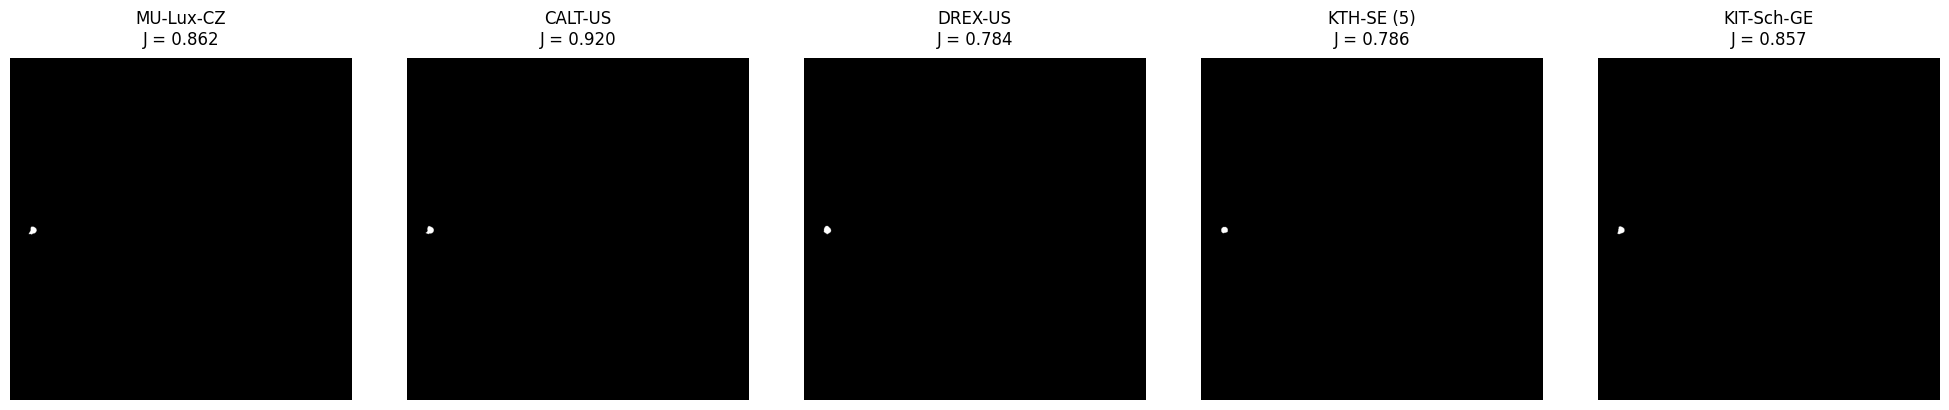

In [39]:
def visualize_masks_with_scores(df):
    """
    Display mask images with their corresponding Jaccard scores
    
    Parameters:
    df: DataFrame containing 'Mask_file' and 'J_value' columns
    """
    n_images = len(df)
    # Create a figure with subplots in a single row
    fig, axes = plt.subplots(1, n_images, figsize=(4*n_images, 4))
    
    # If there's only one image, axes won't be an array
    if n_images == 1:
        axes = [axes]
    
    # Loop through each row in the dataframe
    for idx, (_, row) in enumerate(df.iterrows()):
        # Read the mask image
        mask = tifffile.imread(row['merged_image_path'])[1]
        # Display the mask
        axes[idx].imshow(mask, cmap='gray')
        axes[idx].axis('off')
        
        # Add the Jaccard score as a title
        team_name = row['Mask_file'].split('/')[2]  # Extract team name from path
        axes[idx].set_title(f'{team_name}\nJ = {row["J_value"]:.3f}', pad=10)
    
    plt.tight_layout()
    return fig

# Create the visualization
fig = visualize_masks_with_scores(all_rows_with_given_label_and_given_gt_mask)
plt.show()


In [ ]:
# check if the Jaccards matches:

In [52]:
def recheck_jaccard_matches(df):
    # Loop through each row in the dataframe
    for idx, (_, row) in enumerate(df.iterrows()):
        # Read the mask image
        mask = tifffile.imread(row['merged_image_path'])[1]
        label = row['Label']
        gt_mask = tifffile.imread(row['Gt_mask_file']) == label
        calculated_jaccard_score = np.round(jaccard_score(gt_mask, mask, average="micro"),6)
        given_jaccard_score = row['J_value']
        print(f"{calculated_jaccard_score=}")
        print(f"{given_jaccard_score=}")

In [53]:
recheck_jaccard_matches(all_rows_with_given_label_and_given_gt_mask)

calculated_jaccard_score=0.861789
given_jaccard_score=0.861789
calculated_jaccard_score=0.92033
given_jaccard_score=0.92033
calculated_jaccard_score=0.784461
given_jaccard_score=0.784461
calculated_jaccard_score=0.785714
given_jaccard_score=0.785714
calculated_jaccard_score=0.856749
given_jaccard_score=0.856749


In [54]:
# Finally, try the fusion:

In [55]:
# This is AI generated based on the Java implementation from Vlada.

In [56]:
from typing import List, Optional, Tuple
from dataclasses import dataclass

@dataclass
class FusionParams:
    """Parameters for the fusion algorithm"""
    max_iterations: int = 10
    initial_quality_threshold: float = 0.7
    minimal_quality_threshold: float = 0.3
    step_down_quality: float = 0.1
    no_update_iters: int = 2
    majority_threshold: float = 0.5

class AdvancedLabelFuser:
    def __init__(self, params: Optional[FusionParams] = None):
        self.params = params or FusionParams()
        
    def calculate_jaccard(self, img1: np.ndarray, label1: float, 
                         img2: np.ndarray, threshold: float = 1.0) -> float:
        """
        Calculate Jaccard similarity between binary masks
        """
        mask1 = (img1 == label1)
        mask2 = (img2 == 1.0)  # Assuming output image uses 1.0 for the label
        
        intersection = np.logical_and(mask1, mask2).sum()
        union = np.logical_or(mask1, mask2).sum()
        
        return intersection / union if union > 0 else 0.0

    def get_majority_threshold(self, images: List[np.ndarray], 
                             weights: List[float]) -> float:
        """
        Calculate majority threshold based on available images and their weights
        """
        valid_weights = [w for img, w in zip(images, weights) if img is not None]
        return self.params.majority_threshold * sum(valid_weights)

    def weighted_voting(self, images: List[np.ndarray], 
                       labels: List[float],
                       weights: List[float],
                       min_acceptable_weight: float) -> np.ndarray:
        """
        Perform weighted voting fusion
        """
        if not any(img is not None for img in images):
            raise ValueError("No valid images remaining")
            
        # Get shape from first non-None image
        shape = next(img for img in images if img is not None).shape
        result = np.zeros(shape, dtype=float)
        
        # Accumulate weighted votes
        vote_accumulator = np.zeros(shape, dtype=float)
        for img, label, weight in zip(images, labels, weights):
            if img is not None:
                mask = (img == label)
                vote_accumulator += mask * weight
        
        # Apply threshold
        result[vote_accumulator >= min_acceptable_weight] = 1.0
        return result

    def fuse_matching_labels(self, 
                           images: List[np.ndarray],
                           labels: List[float],
                           weights: List[float]) -> Tuple[np.ndarray, List[float]]:
        """
        Main fusion function that mirrors the Java implementation
        """
        if not images or not labels or not weights:
            raise ValueError("Empty inputs provided")
        if not (len(images) == len(labels) == len(weights)):
            raise ValueError("Mismatched input lengths")
            
        # Create working copies
        current_images = images.copy()
        current_weights = weights.copy()
        
        # Get shape from first image
        output_image = np.zeros_like(images[0], dtype=float)
        
        # Initial fusion with majority voting
        min_acceptable_weight = self.get_majority_threshold(current_images, current_weights)
        output_image = self.weighted_voting(current_images, labels, current_weights, 
                                         min_acceptable_weight)
        
        current_quality_threshold = self.params.initial_quality_threshold
        
        # Main iteration loop
        for iteration in range(1, self.params.max_iterations):
            # Update weights based on Jaccard similarity
            for i in range(len(current_images)):
                if current_images[i] is not None:
                    new_weight = self.calculate_jaccard(
                        current_images[i], labels[i], output_image
                    )
                    current_weights[i] = new_weight
                    
                    # Filter out low-quality inputs after initial settling
                    if (iteration >= self.params.no_update_iters and 
                        new_weight < current_quality_threshold):
                        current_images[i] = None
            
            # Create new candidate
            output_image.fill(0)
            min_acceptable_weight = self.get_majority_threshold(
                current_images, current_weights
            )
            output_image = self.weighted_voting(
                current_images, labels, current_weights, min_acceptable_weight
            )
            
            # Update quality threshold
            if iteration > self.params.no_update_iters:
                current_quality_threshold = max(
                    current_quality_threshold - self.params.step_down_quality * 
                    (iteration - self.params.no_update_iters),
                    self.params.minimal_quality_threshold
                )
                
        return output_image, current_weights